**Travelling Salesman Problem using Simulated Annealing**


In [ ]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import pandas as pd

**Our Objectives here are to OPTIMIZE or minimize distance and time taken to cover all the points**

Best route: [18  1 14  3  6 17 12 13 11  9 10  5 15  7 19  4 16  2  0  8]
Best distance: 4.760300265795604
Best time: 0.06784264769201186


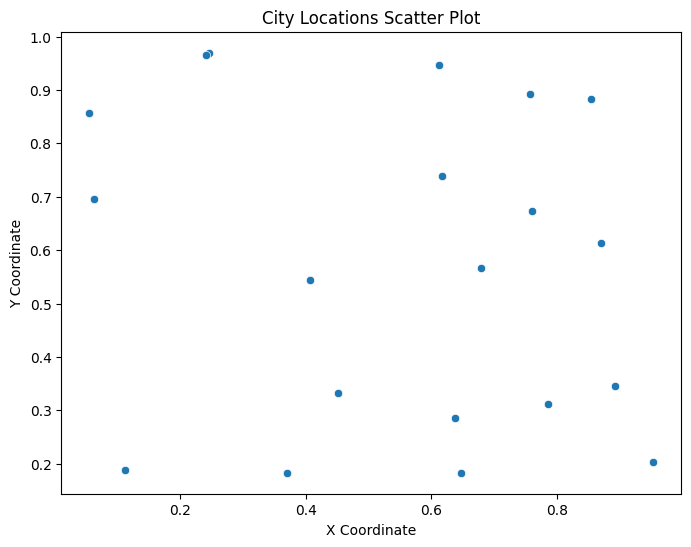

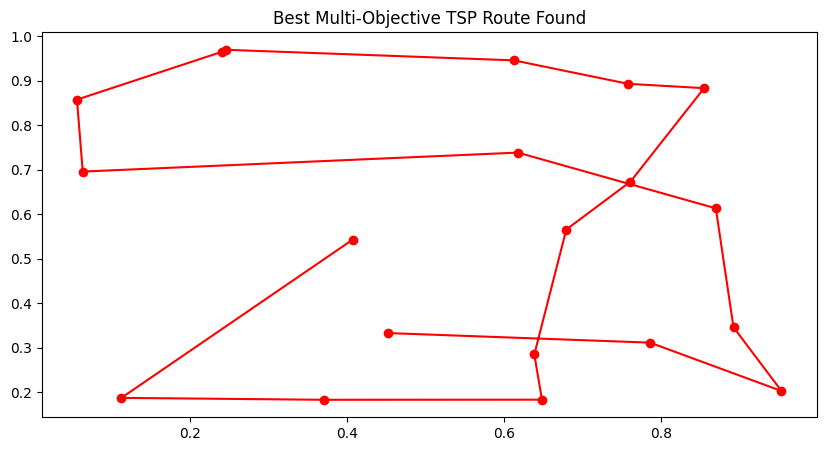

In [ ]:
# Define the multi-objective TSP class
class MultiObjectiveTSP:
    def __init__(self, num_cities):
        self.num_cities = num_cities
        self.locations = np.random.rand(num_cities, 2)
        self.distance_matrix = squareform(pdist(self.locations, 'euclidean'))
        # Simulating different speed limits for each path, hence different travel times
        self.time_matrix = self.distance_matrix / np.random.uniform(30, 100, size=(num_cities, num_cities))
        self.route = np.arange(num_cities)
        np.random.shuffle(self.route)
        self.best_distance = self.calculate_distance(self.route)
        self.best_time = self.calculate_time(self.route)

    def calculate_distance(self, route):
        return np.sum([self.distance_matrix[route[i], route[i+1]] for i in range(-1, self.num_cities - 1)])

    def calculate_time(self, route):
        return np.sum([self.time_matrix[route[i], route[i+1]] for i in range(-1, self.num_cities - 1)])

    def acceptance_probability(self, current_scores, new_scores, temperature):
        current_distance, current_time = current_scores
        new_distance, new_time = new_scores
        if new_distance < current_distance and new_time < current_time:
            return 1.0
        else:
            distance_probability = np.exp((current_distance - new_distance) / temperature)
            time_probability = np.exp((current_time - new_time) / temperature)
            return distance_probability * time_probability

    def simulated_annealing(self, initial_temperature, cooling_rate, stopping_temperature):
        current_route = self.route.copy()
        current_distance = self.best_distance
        current_time = self.best_time
        temperature = initial_temperature

        while temperature > stopping_temperature:
            new_route = current_route.copy()
            a, b = np.random.choice(self.num_cities, 2, replace=False)
            new_route[a], new_route[b] = new_route[b], new_route[a]
            new_distance = self.calculate_distance(new_route)
            new_time = self.calculate_time(new_route)

            if self.acceptance_probability((current_distance, current_time), (new_distance, new_time), temperature) > np.random.rand():
                current_route = new_route.copy()
                current_distance = new_distance
                current_time = new_time
                if new_distance < self.best_distance and new_time < self.best_time:
                    self.route = current_route
                    self.best_distance = new_distance
                    self.best_time = new_time

            temperature *= cooling_rate

        return self.route, self.best_distance, self.best_time

# Set the parameters for the simulated annealing
num_cities = 20
initial_temperature = 100.0
cooling_rate = 0.995
stopping_temperature = 0.01

mo_tsp = MultiObjectiveTSP(num_cities)
best_route, best_distance, best_time = mo_tsp.simulated_annealing(initial_temperature, cooling_rate, stopping_temperature)

print("Best route:", best_route)
print("Best distance:", best_distance)
print("Best time:", best_time)

# Scatter plot of city locations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mo_tsp.locations[:, 0], y=mo_tsp.locations[:, 1])
plt.title('City Locations Scatter Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Plot the route
plt.figure(figsize=(10, 5))
plt.plot(mo_tsp.locations[best_route][:, 0], mo_tsp.locations[best_route][:, 1], 'o-r')
plt.title('Best Multi-Objective TSP Route Found')
plt.show()


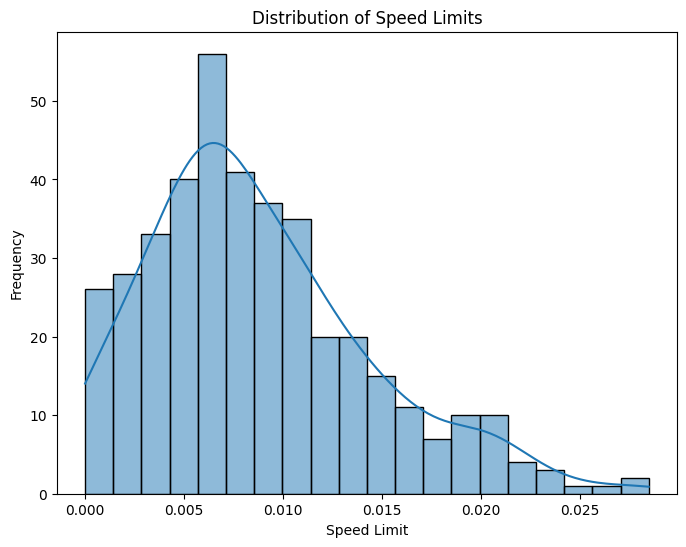

In [ ]:
speed_limits = mo_tsp.time_matrix.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(speed_limits, bins=20, kde=True)
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()


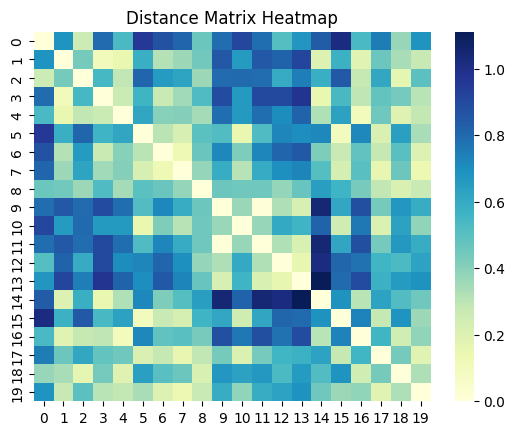

In [ ]:
import seaborn as sns
sns.heatmap(mo_tsp.distance_matrix, cmap="YlGnBu")
plt.title('Distance Matrix Heatmap')
plt.show()
